# CutOut

CutOut is a regularization method that erases a part of the area in each selected image at random.

[Reference] Terrance DeVries, Graham W. Taylor, "Improved Regularization of Convolutional Neural Networks with Cutout", arXiv preprint arXiv:1708.04552}, 2017

## 1. Library

In [1]:
import torch
import torchvision
import torchvision.transforms as tr
from torch.utils.data import DataLoader, Dataset 
import numpy as np 
import matplotlib.pyplot as plt

## CutOut

default ratio=0.5: CutOut images are randomly selected based on the probability.

In [2]:
class CutOut:
    
    def __init__(self, ratio=.5):
        self.ratio = int(1/ratio)
           
    def __call__(self, inputs):

        active = int(np.random.randint(0, self.ratio, 1))
        
        
        if active == 0:
            _, w, h = inputs.size()
            min_len = min(w, h)
            w_c = int(np.random.randint(2, 8, 1))
            h_c = int(np.random.randint(2, 8, 1))
            w_size = int(min_len//w_c)
            h_size = int(min_len//h_c)
            th = max(w_size, h_size)
            idx = int(np.random.randint(0, min_len-th, 1))
            inputs[:,idx:idx+w_size,idx:idx+h_size] = 0
        
        return inputs

In [3]:
transf = tr.Compose([tr.Resize(128), tr.ToTensor(), CutOut()])
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transf)

Files already downloaded and verified


In [4]:
def imshow(img):
    plt.figure(figsize=(20,200))
    plt.imshow(img.permute(1,2,0).numpy())
    plt.show()

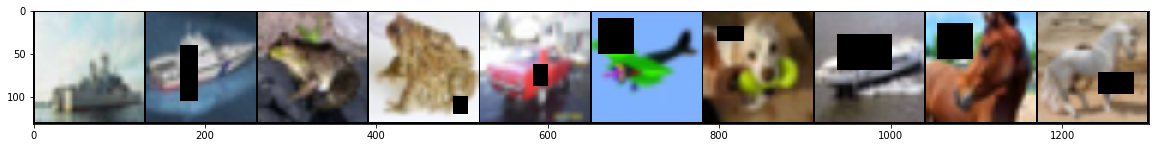

torch.Size([10, 3, 128, 128])


In [5]:
trainloader = DataLoader(trainset, batch_size=10, shuffle=True)
images, labels = iter(trainloader).next()
imshow(torchvision.utils.make_grid(images,nrow=10))
print(images.size())